# Processing h5 files with LibROSA data



In [64]:
import h5py
import numpy as np
import os
import pandas as pd
%matplotlib inline

In [65]:
beethoven_5_files = [
        "295/01.h5",
        "340/01.h5",
        "349/01.h5",
        "1219/01.h5",
        "1222/05.h5",
        "1398/04.h5",
        "1449/01.h5",
        "1709/09.h5",
        "1710/03.h5",
        "1711/02.h5",
        "1758/01.h5",
        "1911/01.h5"
]

In [100]:
def read_h5(filename, end):
    fp     = h5py.File("data/%s" % filename, "r")
    onsets = fp.get('librosa.onset.onset_detect')
    series = pd.Series(onsets[:end], name=filename)
    fp.close()
    return series

def read_files(files, end):
    df = pd.DataFrame()
    for filename in files:
        df = df.append(read_h5(filename, end))
    return df



In [103]:
df = read_files(beethoven_5_files, 370).T


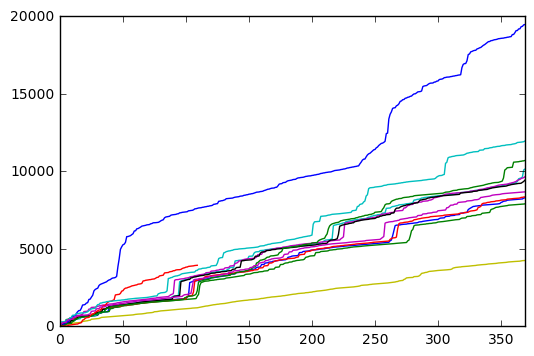

In [104]:
df.plot(legend=False)

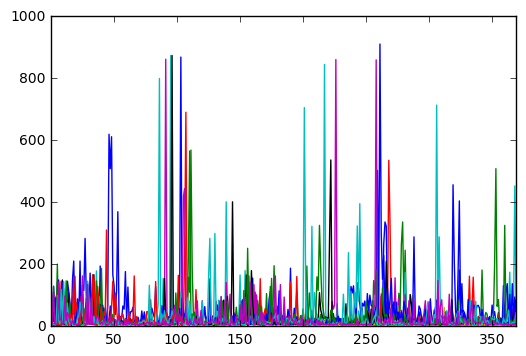

In [105]:
df.diff().fillna(0).plot(legend=False)